<a href="https://colab.research.google.com/github/daemonX10/Data-Science/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 297MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s]


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2932 - accuracy: 0.5555 - val_loss: 12.0446 - val_accuracy: 0.5066
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6463 - accuracy: 0.6323 - val_loss: 21.5990 - val_accuracy: 0.5786
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5408 - accuracy: 0.7250 - val_loss: 137.1231 - val_accuracy: 0.5044
Epoch 4/10
625/625 [==============================] - 77s 120ms/step - loss: 0.4731 - accuracy: 0.7743 - val_loss: 142.6530 - val_accuracy: 0.5018
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4157 - accuracy: 0.8074 - val_loss: 156.3186 - val_accuracy: 0.5162
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3404 - accuracy: 0.8507 - val_loss: 161.5365 - val_accuracy: 0.5082
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2735 - accuracy: 0.8840 - val_loss: 189.2

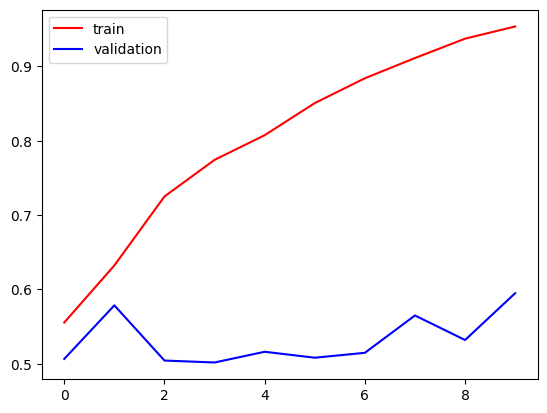

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

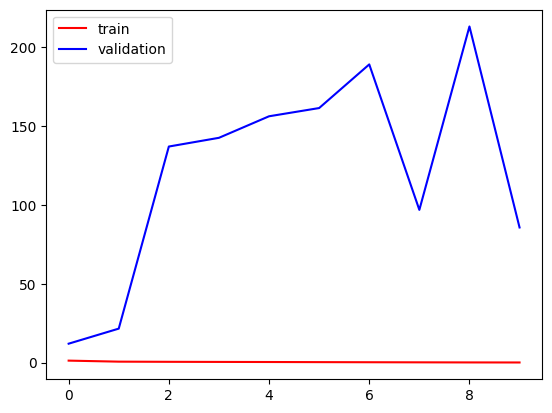

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity